In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np

In [2]:
def plot(**keywords):
    if keywords['plot_name']: # plot_nameがあったらグラフ保存モード
        matplotlib.use('Agg')  # Needed to run without X-server
    for fpaths, label in zip(keywords['files'], keywords['labels']): 
        for fpath in fpaths:
            if os.path.isdir(fpath): #もしディレクトリなら
                fpath = os.path.join(fpath, 'scores.txt') #その中のscores.txtをパスに
            if not os.path.exists(fpath):
                continue
            score = pd.read_csv(fpath, delimiter='\t') #scores.txtの読み込み
            score['steps'] = score['steps'] // 1000 * 1000
            score['label'] = label
            try:
                scores = pd.concat((scores, score))
            except:
                scores = score
        
        try:
                scores_all = pd.concat((scores_all, scores))
        except:
                scores_all = scores
        del scores
    
    sns.lineplot(x=keywords['x'], y=keywords['y'], hue='label', data=scores_all)
    plt.xlabel('steps') #x軸ラベル
    plt.ylabel(keywords['y'])#y軸ラベル
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,) #凡例
    if keywords['title']: 
        plt.title(keywords['title']) 
    #plt.style.use('classic')
        
    if keywords['plot_name']: # 保存モードのとき
        fig_fname = keywords['plot_name'] + '.png' #png形式で保存
        plt.savefig(fig_fname)
        print('Saved a figure as {}'.format(fig_fname))
    plt.show()
def plot(**keywords):
    if keywords['plot_name']: # plot_nameがあったらグラフ保存モード
        matplotlib.use('Agg')  # Needed to run without X-server
    for fpaths, label in zip(keywords['files'], keywords['labels']): 
        for fpath in fpaths:
            if os.path.isdir(fpath): #もしディレクトリなら
                fpath = os.path.join(fpath, 'scores.txt') #その中のscores.txtをパスに
            if not os.path.exists(fpath):
                continue
            score = pd.read_csv(fpath, delimiter='\t') #scores.txtの読み込み
            score['steps'] = score['steps'] // 1000 * 1000
            score['label'] = label
            try:
                scores = pd.concat((scores, score))
            except:
                scores = score
        
        try:
                scores_all = pd.concat((scores_all, scores))
        except:
                scores_all = scores
        del scores
    
    sns.lineplot(x=keywords['x'], y=keywords['y'], hue='label', data=scores_all)

    plt.xlabel('steps') #x軸ラベル
    plt.ylabel(keywords['y'])#y軸ラベル
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,) #凡例
    if keywords['title']: 
        plt.title(keywords['title']) 
    #plt.style.use('classic')
        
    if keywords['plot_name']: # 保存モードのとき
        fig_fname = keywords['plot_name'] + '.png' #png形式で保存
        plt.savefig(fig_fname)
        print('Saved a figure as {}'.format(fig_fname))
    plt.show()


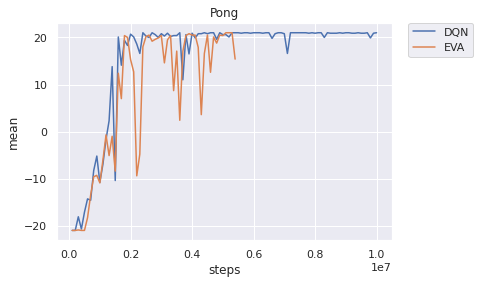

In [9]:
def plots(game, x, y):
    files = {"Pong":[
                    [
                        '/root/eva_based_on_pfrl/results/PongNoFrameskip-v4/DQN_20201105T140254',
                    ],
                    [
                        '/root/eva_based_on_pfrl/results/PongNoFrameskip-v4/EVA_20201106T134908',
                    ],
                ],
    }
    labels = {
                "Pong":['DQN', 'EVA']
             }
    plot(title=game, files=files[game], labels=labels[game], plot_name=None, x=x, y=y)

plots(game='Pong', x='steps', y='mean')
